In [72]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler
from matplotlib_venn import venn2

In [74]:
# Read in the RPM normalized data
counts = pd.read_csv("../data/processed/nt_rpm_minus_control_expression.csv", index_col=0)
aa_counts = pd.read_csv("../data/processed/aa_rpm_minus_control_expression.csv", index_col=0)

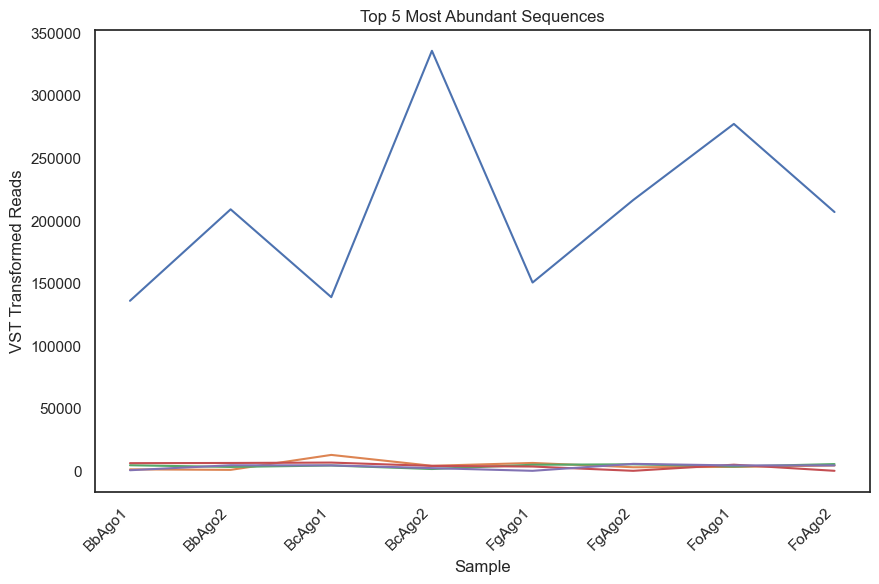

In [75]:
# Calculate the sum of the counts for each sequence across all samples
sequence_sums = counts.sum(axis=1)

# Get the top 10 sequences
top_sequences = sequence_sums.nlargest(5).index

# Plot the relative abundance of the top 10 sequences
plt.figure(figsize=(10, 6))
for sequence in top_sequences:
    plt.plot(counts.columns, counts.loc[sequence], label=sequence)

plt.xlabel('Sample')
plt.ylabel('VST Transformed Reads')
plt.title('Top 5 Most Abundant Sequences')
# rotate x-axis labels
plt.xticks(rotation=45, ha='right')
#plt.legend()
plt.show()

## An upset plot in R may be a nice way to visualize the results of this analysis.

In [77]:
# Function to get top 5 expressed sequences for a sample
def get_top_sequences(df, sample):
    return df[sample].sort_values(ascending=False).head(5)

# Define the biological replicates
biological_replicates = {
    'BbAgo': ['BbAgo1', 'BbAgo2'],
    'BcAgo': ['BcAgo1', 'BcAgo2'],
    'FgAgo': ['FgAgo1', 'FgAgo2'],
    'FoAgo': ['FoAgo1', 'FoAgo2']
}

# Initialize an empty dictionary to hold the top sequences for each sample
top_sequences_dict = {}

# For each biological replicate
for replicate, samples in biological_replicates.items():
    # For each sample
    for sample in samples:
        # Get top 5 sequences
        top_sequences = get_top_sequences(counts, sample)
        print(f'Top 5 sequences for {sample}:')
        print(top_sequences)
        
        # Add the top sequences to the dictionary
        top_sequences_dict[sample] = list(top_sequences.index)  # Convert set to list

# Identify the top 5 sequences for each sample
top_5_sequences = {sample: set(counts[sample].nlargest(5).index) for sample in counts.columns}

# Create a new DataFrame filled with False
upset_data = pd.DataFrame(False, index=counts.index, columns=counts.columns)

# Replace False with True for the top 5 sequences
for sample, sequences in top_5_sequences.items():
    upset_data.loc[list(sequences), sample] = True

# Convert boolean values to integers
upset_data = upset_data.astype(int)

upset_data.to_csv('../data/processed/nt_upset_data.csv')

Top 5 sequences for BbAgo1:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT    135807.424519
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCAACATTAGAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      8182.697257
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTGACCTTTAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7513.576157
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTCAGGTTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7335.080243
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCAAATACGAAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      6238.542380
Name: BbAgo1, dtype: float64
Top 5 sequences for BbAgo2:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGT

In [78]:
# Initialize an empty dictionary to hold the top sequences for each sample
top_sequences_dict = {}

# For each biological replicate
for replicate, samples in biological_replicates.items():
    # For each sample
    for sample in samples:
        # Get top 5 sequences
        top_sequences = get_top_sequences(aa_counts, sample)
        print(f'Top 5 sequences for {sample}:')
        print(top_sequences)
        
        # Add the top sequences to the dictionary
        top_sequences_dict[sample] = list(top_sequences.index)  # Convert set to list

# Identify the top 5 sequences for each sample
top_5_sequences = {sample: set(aa_counts[sample].nlargest(5).index) for sample in aa_counts.columns}

# Create a new DataFrame filled with False
aa_upset_data = pd.DataFrame(False, index=aa_counts.index, columns=aa_counts.columns)

# Replace False with True for the top 5 sequences
for sample, sequences in top_5_sequences.items():
    aa_upset_data.loc[list(sequences), sample] = True

# Convert boolean values to integers
aa_upset_data = aa_upset_data.astype(int)

aa_upset_data.to_csv('../data/processed/aa_upset_data.csv')

Top 5 sequences for BbAgo1:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    136037.706285
TTIASIAAKEEGVSLDKREAEAWCLRVGQPCW**RTDVDTLLTLLNKRIS     12673.220827
TTIASIAAKEEGVSLDKREAEAWCNIRGQPCW**RTDVDTLLTLLNKRIS      8178.561947
TTIASIAAKEEGVSLDKREAEAWCKDLGQPCW**RTDVDTLLTLLNKRIS      8120.997180
TTIASIAAKEEGVSLDKREAEAWCLRPGQPCW**RTDVDTLLTLLNKRIS      7931.022714
Name: BbAgo1, dtype: float64
Top 5 sequences for BbAgo2:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    209266.964321
TTIASIAAKEEGVSLDKREAEAWCV*MGQPCW**RTDVDTLLTLLNKRIS      8711.546532
TTIASIAAKEEGVSLDKREAEAWCRDYGQPCW**RTDVDTLLTLLNKRIS      7655.224626
TTIASIAAKEEGVSLDKREAEAWCNASGQPCW**RTDVDTLLTLLNKRIS      7366.396821
TTIASIAAKEEGVSLDKREAEAWCLRVGQPCW**RTDVDTLLTLLNKRIS      6883.303440
Name: BbAgo2, dtype: float64
Top 5 sequences for BcAgo1:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    138957.727364
TTIASIAAKEEGVSLDKREAEAWCLLDGQPCW**RTDVDTLLTLLNKRIS     12694.345506
TTIASIAAKEEGVSLDKREAEAWCV*MGQPCW**RTDVDTLL

Top 5 sequences for BbAgo1:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT    135807.424519
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCAACATTAGAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      8182.697257
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTGACCTTTAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7513.576157
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTCAGGTTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7335.080243
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCAAATACGAAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      6238.542380
Name: BbAgo1, dtype: float64
Top 5 sequences for BbAgo2:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGT

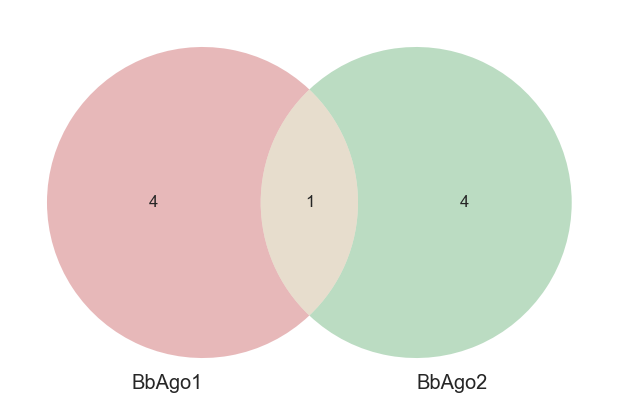

Top 5 sequences for BcAgo1:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT    138730.454901
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTGCTAGATGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT     12705.483274
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCGTGTGAATGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      8951.696534
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCCGTCCTGTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7618.001845
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCCGAGAATGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7613.919107
Name: BcAgo1, dtype: float64
Top 5 sequences for BcAgo2:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGT

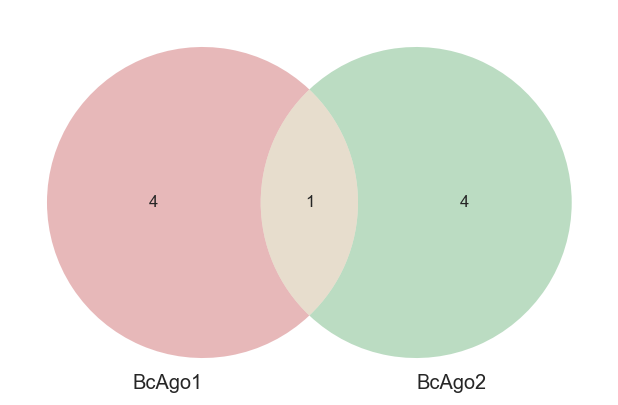

Top 5 sequences for FgAgo1:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT    150394.831409
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTCAGGTTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      9223.052248
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCGCAAAAGCAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7936.404323
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTGCGACATGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      7845.820774
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTAATGTTATGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      6757.412235
Name: FgAgo1, dtype: float64
Top 5 sequences for FgAgo2:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGT

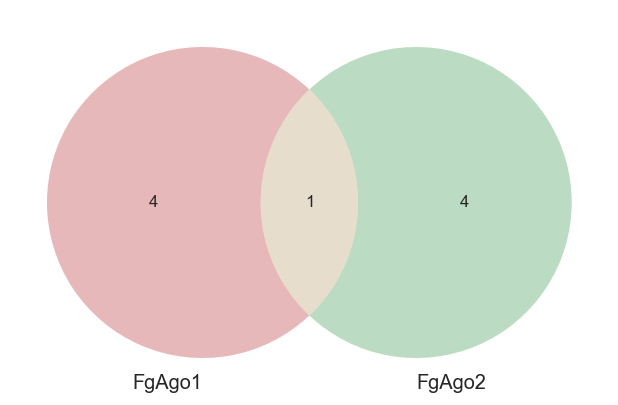

Top 5 sequences for FoAgo1:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT    277113.103539
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTGGACGATGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      8939.179927
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCGTGATAGTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCT      6512.631541
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCCGAGAATGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      6491.157661
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTTATTTACGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT      6444.665669
Name: FoAgo1, dtype: float64
Top 5 sequences for FoAgo2:
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGT

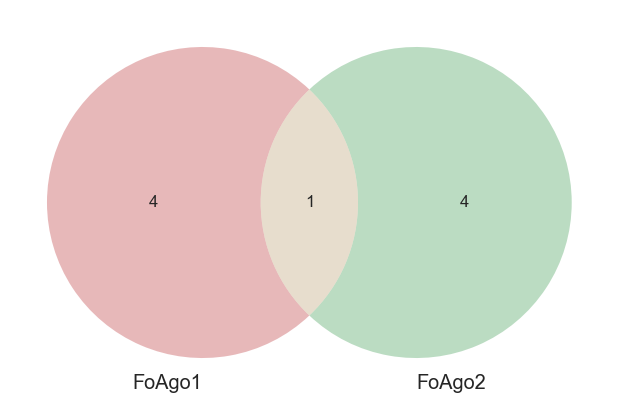

In [79]:
# Function to get top 5 expressed sequences for a sample
def get_top_sequences(df, sample):
    return df[sample].sort_values(ascending=False).head(5)

# For each biological replicate
for replicate, samples in biological_replicates.items():
    # For each sample
    for sample in samples:
        # Get top 5 sequences
        top_sequences = get_top_sequences(counts, sample)
        print(f'Top 5 sequences for {sample}:')
        print(top_sequences)
        
    # Compare top 5 sequences of samples within the same biological replicate
    if len(samples) > 1:
        sample1_top_sequences = get_top_sequences(counts, samples[0])
        sample2_top_sequences = get_top_sequences(counts, samples[1])
        common_sequences = set(sample1_top_sequences.index) & set(sample2_top_sequences.index)
        print(f'Common top 5 sequences for {samples[0]} and {samples[1]}:')
        print(common_sequences)
        
        # Plot Venn diagram
        plt.figure(figsize=(10, 5))
        venn2([set(sample1_top_sequences.index), set(sample2_top_sequences.index)], set_labels = (samples[0], samples[1]))
        plt.show()

# Amino Acid sequences

Relative abundance

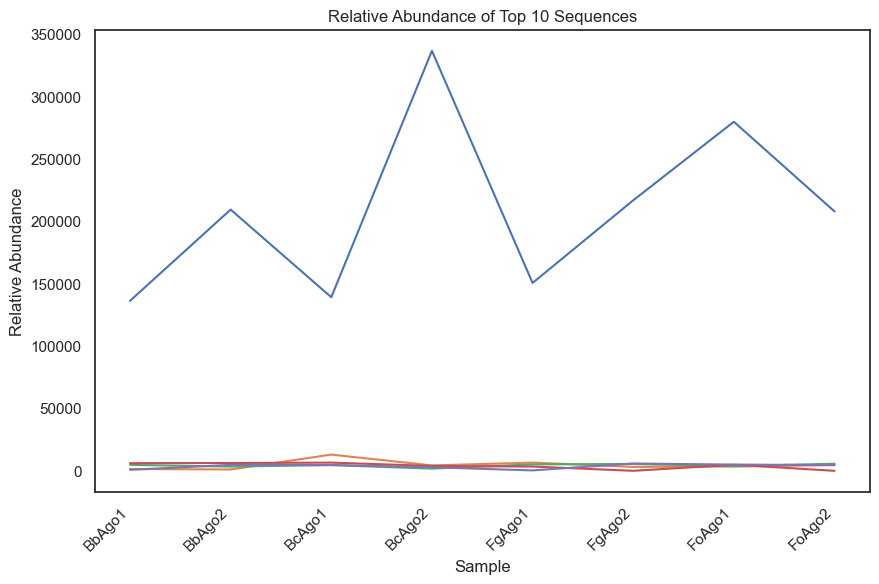

In [80]:
# Calculate the sum of the counts for each sequence across all samples
aa_sequence_sums = aa_counts.sum(axis=1)

# Get the top 10 sequences
aa_top_sequences = aa_sequence_sums.nlargest(5).index

# Plot the relative abundance of the top 10 sequences
plt.figure(figsize=(10, 6))
for sequence in aa_top_sequences:
    plt.plot(aa_counts.columns, aa_counts.loc[sequence], label=sequence)

plt.xlabel('Sample')
plt.ylabel('Relative Abundance')
plt.title('Relative Abundance of Top 10 Sequences')
# rotate x-axis labels
plt.xticks(rotation=45, ha='right')
#plt.legend()
plt.show()

Top 5 sequences for BbAgo1:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    136037.706285
TTIASIAAKEEGVSLDKREAEAWCLRVGQPCW**RTDVDTLLTLLNKRIS     12673.220827
TTIASIAAKEEGVSLDKREAEAWCNIRGQPCW**RTDVDTLLTLLNKRIS      8178.561947
TTIASIAAKEEGVSLDKREAEAWCKDLGQPCW**RTDVDTLLTLLNKRIS      8120.997180
TTIASIAAKEEGVSLDKREAEAWCLRPGQPCW**RTDVDTLLTLLNKRIS      7931.022714
Name: BbAgo1, dtype: float64
Top 5 sequences for BbAgo2:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    209266.964321
TTIASIAAKEEGVSLDKREAEAWCV*MGQPCW**RTDVDTLLTLLNKRIS      8711.546532
TTIASIAAKEEGVSLDKREAEAWCRDYGQPCW**RTDVDTLLTLLNKRIS      7655.224626
TTIASIAAKEEGVSLDKREAEAWCNASGQPCW**RTDVDTLLTLLNKRIS      7366.396821
TTIASIAAKEEGVSLDKREAEAWCLRVGQPCW**RTDVDTLLTLLNKRIS      6883.303440
Name: BbAgo2, dtype: float64
Common top 5 sequences for BbAgo1 and BbAgo2:
{'TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS', 'TTIASIAAKEEGVSLDKREAEAWCLRVGQPCW**RTDVDTLLTLLNKRIS'}


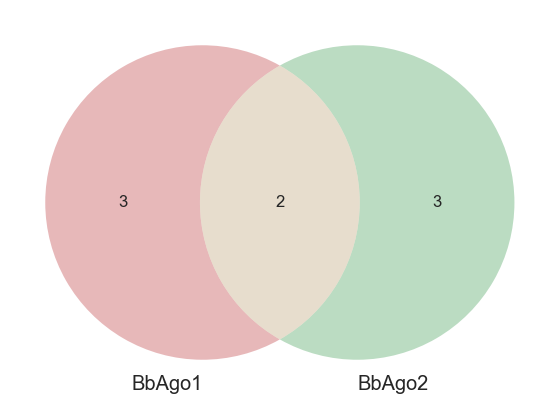

Top 5 sequences for BcAgo1:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    138957.727364
TTIASIAAKEEGVSLDKREAEAWCLLDGQPCW**RTDVDTLLTLLNKRIS     12694.345506
TTIASIAAKEEGVSLDKREAEAWCV*MGQPCW**RTDVDTLLTLLNKRIS      8951.696534
TTIASIAAKEEGVSLDKREAEAWCTPAGQPCW**RTDVDTLLTLLNKRIS      8319.681248
TTIASIAAKEEGVSLDKREAEAWCREWGQPCW**RTDVDTLLTLLNKRIS      7613.919107
Name: BcAgo1, dtype: float64
Top 5 sequences for BcAgo2:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    336657.689503
TTIASIAAKEEGVSLDKREAEAWCV*SGQPCW**RTDVDTLLTLLNKRIS      8806.651086
TTIASIAAKEEGVSLDKREAEAWCDVNGQPCW**RTDVDTLLTLLNKRIS      7528.685289
TTIASIAAKEEGVSLDKREAEAWCYKRGQPCW**RTDVDTLLTLLNKRIS      5902.729866
TTIASIAAKEEGVSLDKREAEAWCSDYGQPCW**RTDVDTLLTLLNKRIS      5693.175745
Name: BcAgo2, dtype: float64
Common top 5 sequences for BcAgo1 and BcAgo2:
{'TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS'}


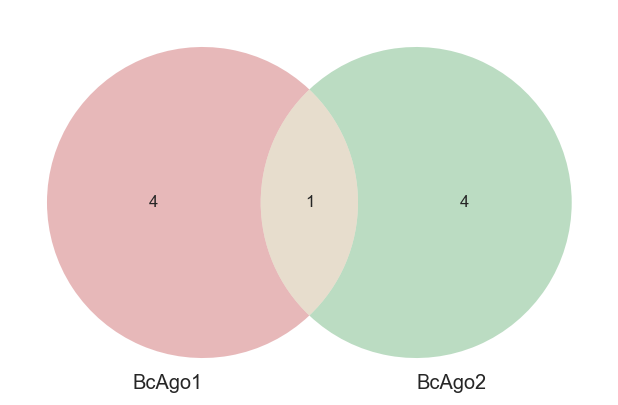

Top 5 sequences for FgAgo1:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    150410.096042
TTIASIAAKEEGVSLDKREAEAWCAKAGQPCW**RTDVDTLLTLLNKRIS      8965.561983
TTIASIAAKEEGVSLDKREAEAWCFRLGQPCW**RTDVDTLLTLLNKRIS      8519.608489
TTIASIAAKEEGVSLDKREAEAWCCDMGQPCW**RTDVDTLLTLLNKRIS      7997.663708
TTIASIAAKEEGVSLDKREAEAWC*V*GQPCW**RTDVDTLLTLLNKRIS      7834.546789
Name: FgAgo1, dtype: float64
Top 5 sequences for FgAgo2:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    216715.082789
TTIASIAAKEEGVSLDKREAEAWCGISGQPCW**RTDVDTLLTLLNKRIS     10691.457710
TTIASIAAKEEGVSLDKREAEAWCH*TGQPCW**RTDVDTLLTLLNKRIS      7398.358888
TTIASIAAKEEGVSLDKREAEAWCVHSGQPCW**RTDVDTLLTLLNKRIS      6222.916759
TTIASIAAKEEGVSLDKREAEAWCH*NGQPCW**RTDVDTLLTLLNKRIS      5641.088412
Name: FgAgo2, dtype: float64
Common top 5 sequences for FgAgo1 and FgAgo2:
{'TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS'}


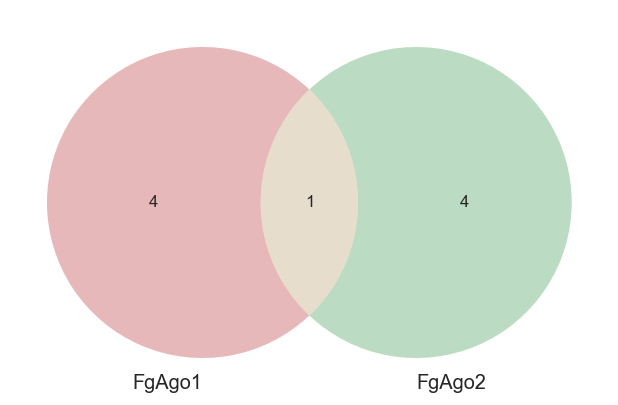

Top 5 sequences for FoAgo1:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    279730.206546
TTIASIAAKEEGVSLDKREAEAWCLWRGQPCW**RTDVDTLLTLLNKRIS     10246.578075
TTIASIAAKEEGVSLDKREAEAWCWTMGQPCW**RTDVDTLLTLLNKRIS      8939.179927
TTIASIAAKEEGGISR*KRG*SLVRDSGTTLLVIEDRCRYVVDTSK*ANF      6512.631541
TTIASIAAKEEGVSLDKREAEAWCREWGQPCW**RTDVDTLLTLLNKRIS      6491.157661
Name: FoAgo1, dtype: float64
Top 5 sequences for FoAgo2:
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS    207775.173887
TTIASIAAKEEGVSLDKREAEAWCQVLGQPCW**RTDVDTLLTLLNKRIS      8295.485530
TTIASIAAKEEGVSLDKREAEAWCLWAGQPCW**RTDVDTLLTLLNKRIS      7906.001685
TTIASIAAKEEGVSLDKREAEAWC*IWGQPCW**RTDVDTLLTLLNKRIS      7825.682707
TTIASIAAKEEGVSLDKREAEAWCLWSGQPCW**RTDVDTLLTLLNKRIS      6966.768410
Name: FoAgo2, dtype: float64
Common top 5 sequences for FoAgo1 and FoAgo2:
{'TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS'}


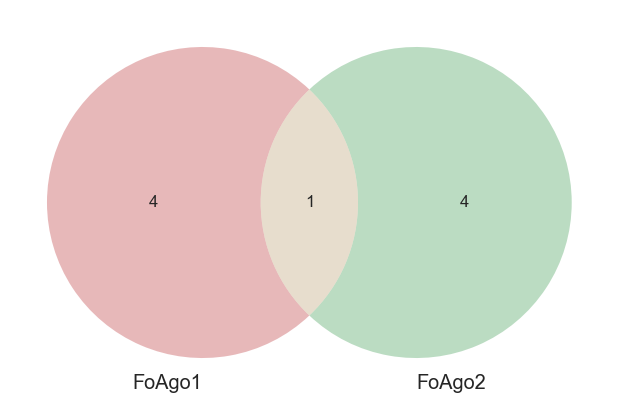

In [81]:
# Function to get top 5 expressed sequences for a sample
def get_top_sequences(df, sample):
    return df[sample].sort_values(ascending=False).head(5)

# For each biological replicate
for replicate, samples in biological_replicates.items():
    # For each sample
    for sample in samples:
        # Get top 5 sequences
        top_sequences = get_top_sequences(aa_counts, sample)
        print(f'Top 5 sequences for {sample}:')
        print(top_sequences)
        
    # Compare top 5 sequences of samples within the same biological replicate
    if len(samples) > 1:
        sample1_top_sequences = get_top_sequences(aa_counts, samples[0])
        sample2_top_sequences = get_top_sequences(aa_counts, samples[1])
        common_sequences = set(sample1_top_sequences.index) & set(sample2_top_sequences.index)
        print(f'Common top 5 sequences for {samples[0]} and {samples[1]}:')
        print(common_sequences)
        
        # Plot Venn diagram
        plt.figure(figsize=(10, 5))
        venn2([set(sample1_top_sequences.index), set(sample2_top_sequences.index)], set_labels = (samples[0], samples[1]))
        plt.show()

## Histograms of top ten seqs per GPCR

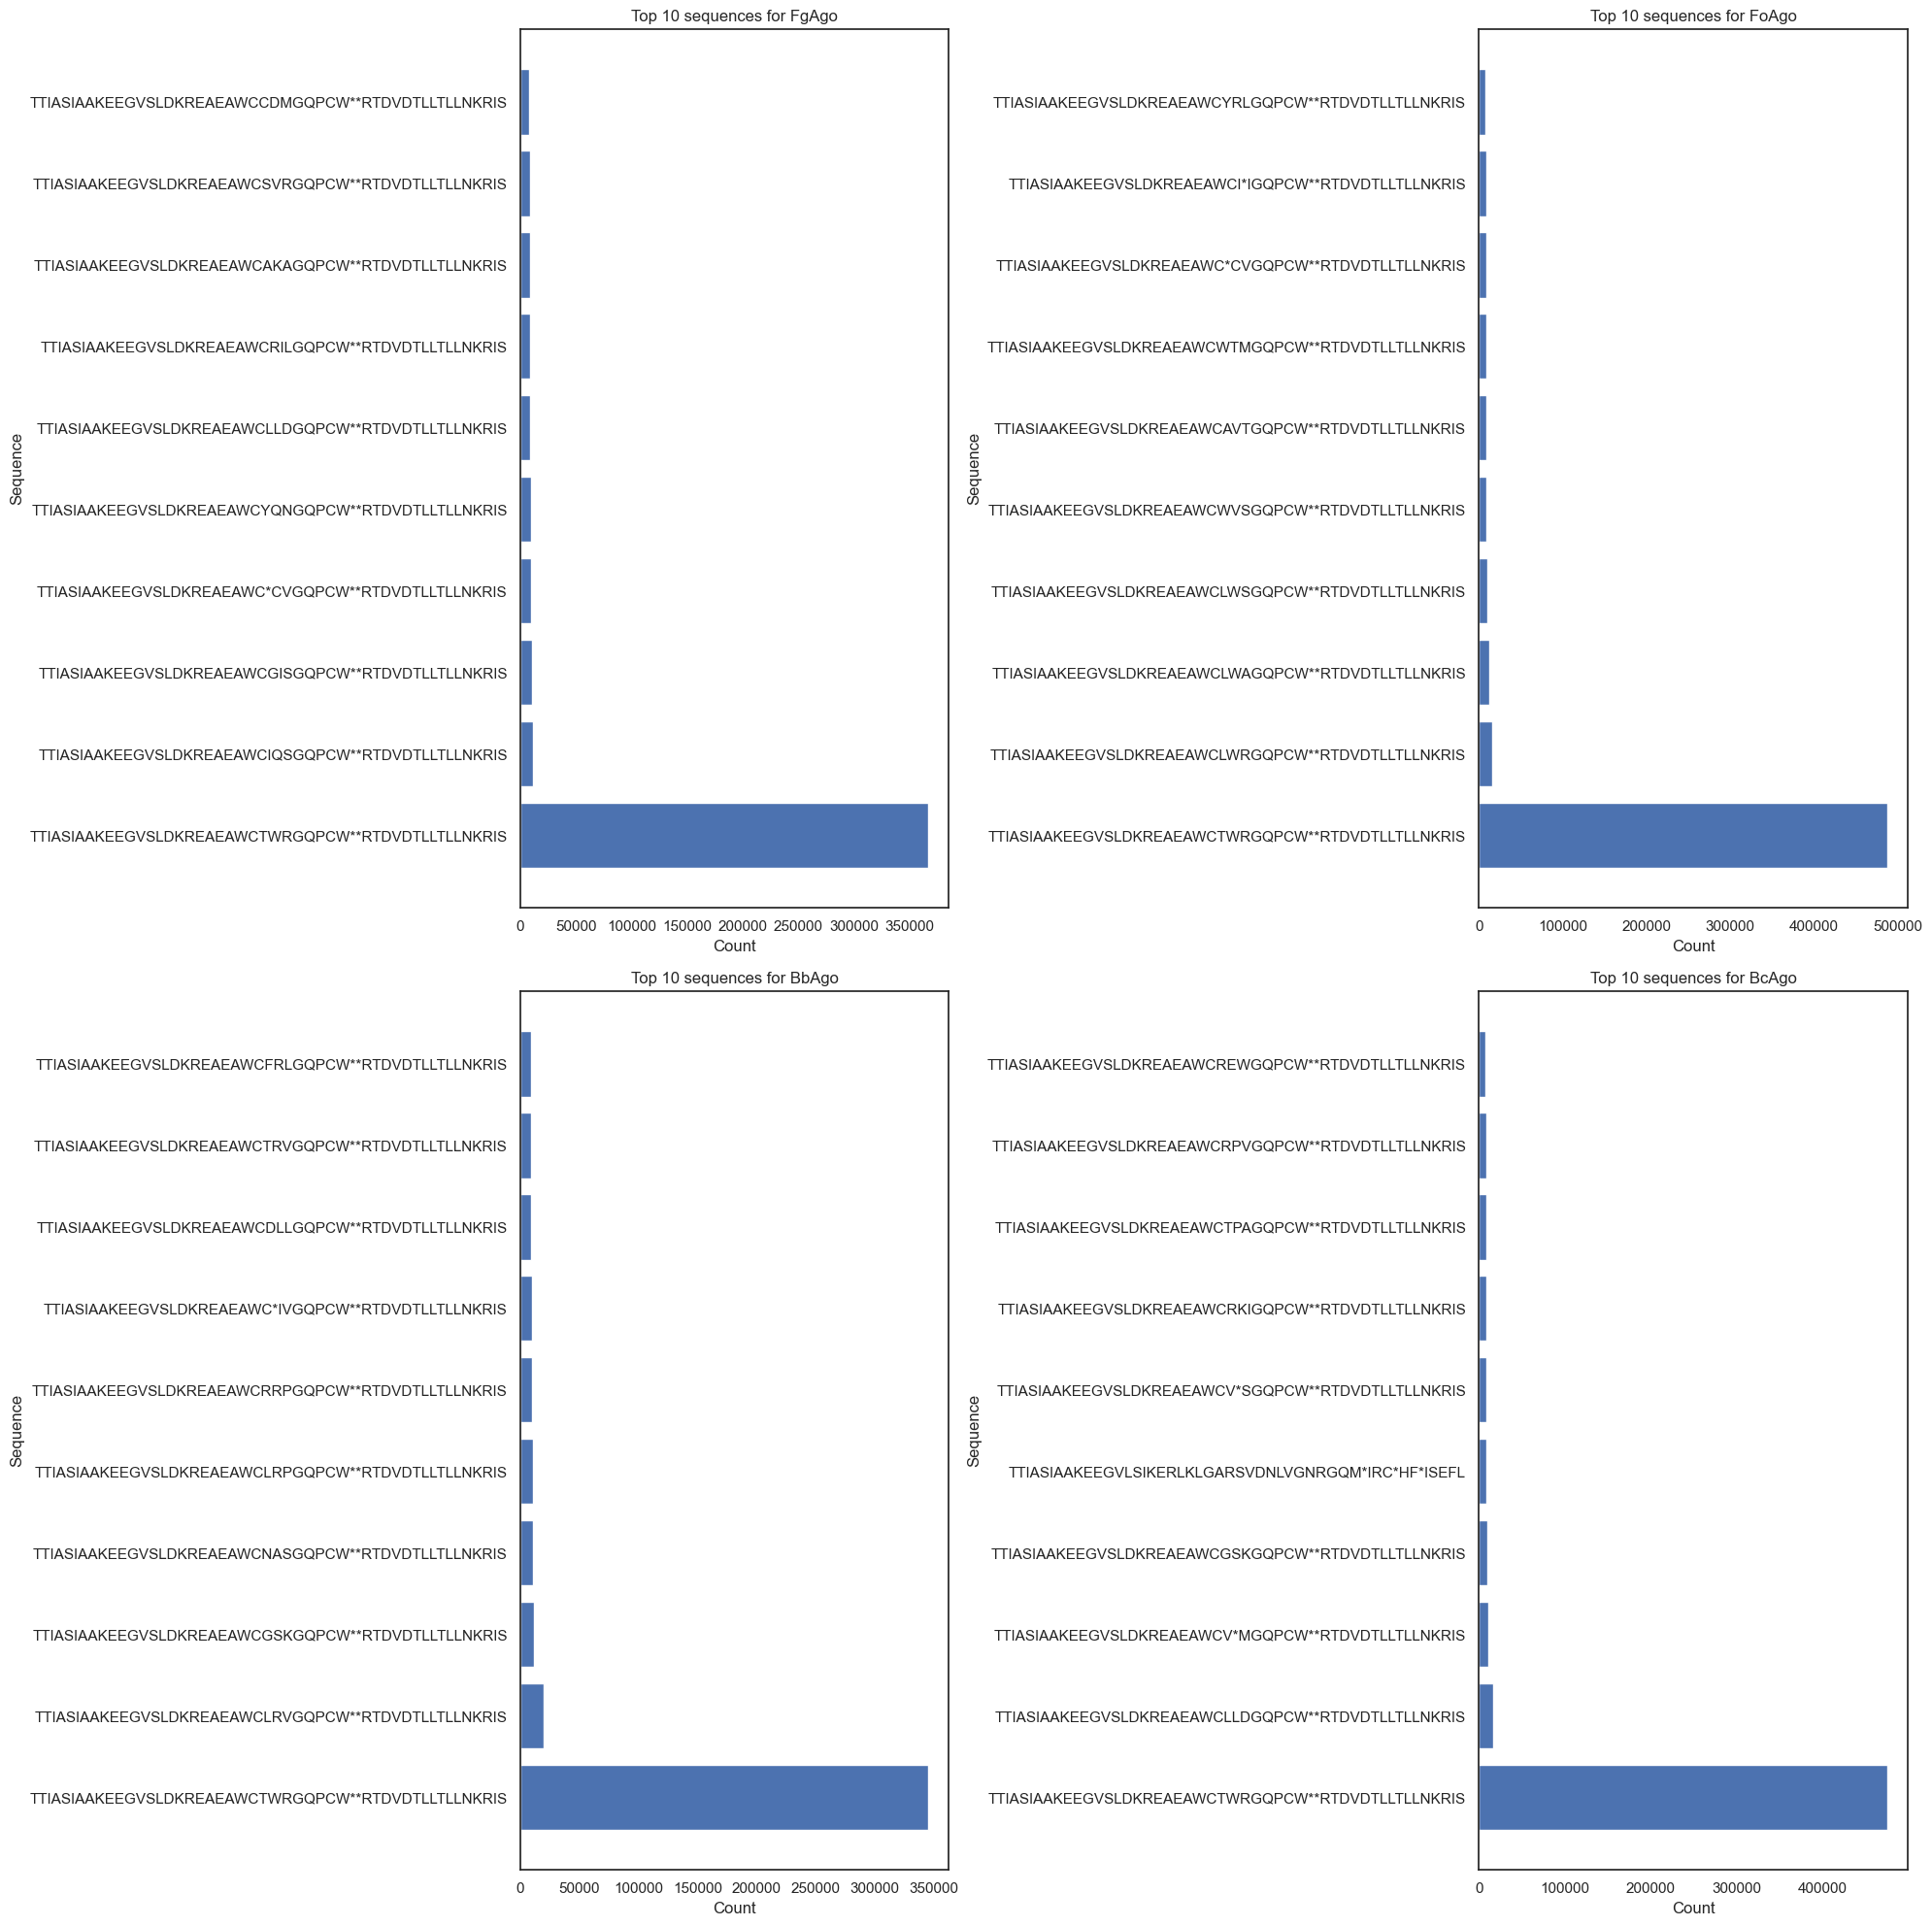

In [83]:
# Set the Seaborn theme
sns.set_theme(style="white", palette=None)

# Define the species
species = ['FgAgo', 'FoAgo', 'BbAgo', 'BcAgo']

# Initialize an empty dictionary to hold the top sequences for each species
top_sequences_dict = {}

# For each species
for specie in species:
    # Filter the count table for this species
    count_table_filtered = aa_counts.filter(regex=specie, axis=1)
    
    # Calculate the sum of counts for each sequence
    sequence_counts = count_table_filtered.sum(axis=1)
    
    # Get the top 10 sequences
    top_sequences = sequence_counts.nlargest(10)
    
    # Add the top sequences to the dictionary
    top_sequences_dict[specie] = top_sequences

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# For each species
for i, specie in enumerate(top_sequences_dict.keys()):
    # Get the top 10 sequences for this species
    top_sequences = top_sequences_dict[specie]
    
    # Plot the top 10 sequences
    axes[i].barh(top_sequences.index, top_sequences.values)
    
    axes[i].set_title(f'Top 10 sequences for {specie}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Sequence')

plt.tight_layout()

# save pdf
plt.savefig('../reports/figures/aa_top_10_sequences_per_species.pdf')

plt.show()